<a href="https://colab.research.google.com/github/Muthu2312/Great_Lakes/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [3]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load the Life expectancy dataset and display the first five records 

In [4]:
df_lifeExp = pd.read_csv("Life_Expectancy.csv")
df_lifeExp.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [5]:
df_lifeExp.shape

(182, 20)

In [6]:
df_lifeExp.describe()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,182.000000,173.000000,182.000000,15.000000,173.000000,182.000000,178.000000,182.000000,182.000000,182.000000,182.00000,157.000000,1.410000e+02,178.000000,178.000000,169.000000,173.000000,173.000000
mean,2014.890110,149.971098,21.741758,2.719333,81.710983,1482.104396,44.411236,28.851648,82.961538,84.357143,0.62033,7098.949079,1.133250e+07,4.368539,4.412360,0.696586,12.845665,72.007514
std,0.457003,95.679846,82.297159,3.887194,25.391991,7859.929395,21.305610,105.904392,24.973658,22.958019,1.33283,11603.099478,2.912065e+07,4.137007,4.223363,0.152706,3.215180,8.032405
min,2013.000000,1.000000,0.000000,0.010000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.10000,33.681223,2.920000e+02,0.100000,0.100000,0.347000,0.000000,51.000000
25%,2015.000000,74.000000,0.000000,0.010000,78.000000,0.000000,24.425000,0.000000,83.250000,84.000000,0.10000,762.261218,2.635310e+05,1.500000,1.400000,0.575000,10.800000,66.200000
50%,2015.000000,137.000000,2.000000,0.010000,93.000000,9.000000,52.650000,2.000000,93.000000,94.000000,0.10000,3111.762887,1.977527e+06,3.150000,3.250000,0.733000,13.100000,74.100000
75%,2015.000000,199.000000,15.000000,5.285000,97.000000,197.250000,62.100000,19.500000,97.750000,97.000000,0.30000,6993.477360,1.127366e+07,6.400000,6.200000,0.799000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,10.660000,99.000000,90387.000000,87.300000,1100.000000,99.000000,99.000000,9.30000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df_lifeExp['Life_Expectancy'].isnull().sum()

9

In [8]:
df_lifeExp.shape

(182, 20)

In [9]:
df_lifeExp.dropna(subset=['Life_Expectancy'],axis =0).shape

(173, 20)

In [10]:
# Or we can do another method also.

In [11]:
null = df_lifeExp['Life_Expectancy'].isnull()

In [12]:
null_list = null.index[null==True].tolist()
null_list

[46, 100, 104, 111, 118, 122, 135, 138, 168]

In [13]:
df_lifeExp.drop(df_lifeExp.index[null_list],inplace =True)

In [14]:
df_lifeExp.shape

(173, 20)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
total_null_counts = df_lifeExp.isnull().sum().sort_values(ascending =False)

In [16]:
total_null_per = ((df_lifeExp.isnull().sum()/df_lifeExp.isnull().count())* 100).sort_values(ascending = False)

In [17]:
df_null_data = pd.concat([total_null_counts,total_null_per],axis =1,keys =['total_null_counts','total_null_percentage'])
df_null_data

,total_null_counts,total_null_percentage
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Schooling,7,4.046243
Income_Index,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069
Country,0,0.000000


In [18]:
# as we see that alcohol data is 95% null values so we cant able to do anything so drop the feature.

In [19]:
df_lifeExp = df_lifeExp.drop("Alcohol",axis=1)

In [20]:
# And check the distribution of the features for imputing the null values. 

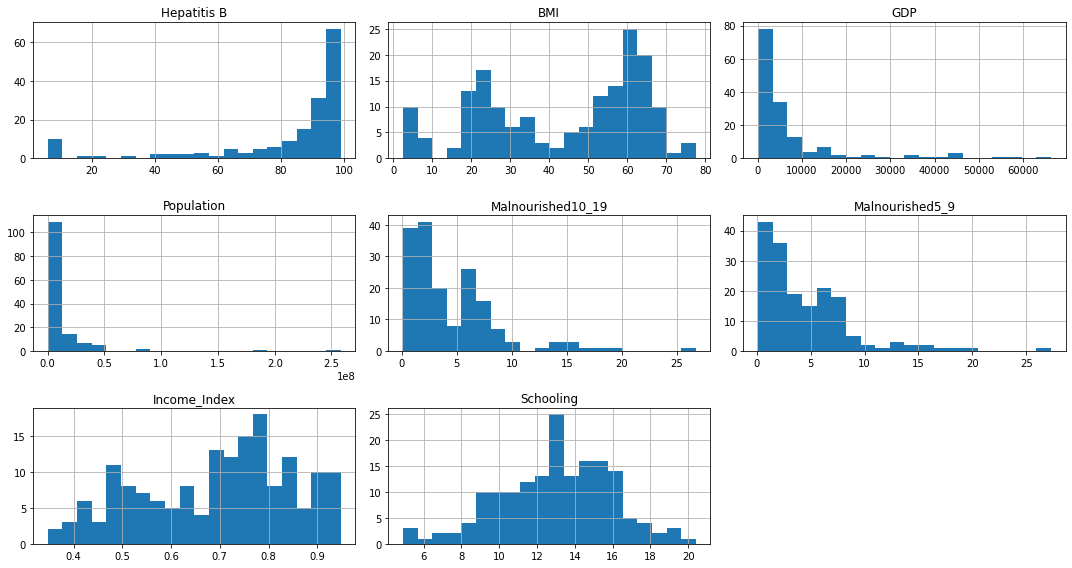

In [21]:
df_lifeExp[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling']].hist(bins=20,figsize=(15,8))
plt.tight_layout()
plt.show()

In [22]:
# impute skewed variables with median

# impute for variable 'GDP'
df_lifeExp['GDP'] = df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())

# impute for variable 'Hepatitis B'
df_lifeExp['Hepatitis B'] = df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())


# impute for variable 'Malnourished10_19'
df_lifeExp['Malnourished10_19'] = df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())


# impute for variable 'Malnourished5_9'
df_lifeExp['Malnourished5_9'] = df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())


# impute for variable 'Population'
df_lifeExp['Population'] = df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())

In [23]:
# impute remaining variables with mean 

# impute for variable 'BMI'
df_lifeExp['BMI'] = df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].mean())

# impute for variable 'Income_Index'
df_lifeExp['Income_Index'] = df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].mean())

# impute for variable 'Schooling' 
df_lifeExp['Schooling'] = df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].mean())

In [24]:
df_lifeExp.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df_lifeExp.describe()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2014.988439,149.971098,22.872832,82.716763,1559.208092,43.466667,30.352601,83.040462,84.508671,0.647399,6764.134560,9.663690e+06,4.492486,4.539306,0.695627,12.995783,72.007514
std,0.152057,95.679846,84.268577,24.066903,8055.443243,20.378109,108.428722,24.833951,22.687364,1.361795,11095.340318,2.650522e+07,4.131178,4.217814,0.150721,2.879849,8.032405
min,2013.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,51.000000
25%,2015.000000,74.000000,0.000000,81.000000,0.000000,24.400000,0.000000,84.000000,84.000000,0.100000,918.677154,5.874820e+05,1.500000,1.500000,0.576000,11.100000,66.200000
50%,2015.000000,137.000000,2.000000,93.000000,16.000000,51.000000,3.000000,93.000000,94.000000,0.100000,3124.343998,2.174645e+06,3.300000,3.300000,0.723000,13.100000,74.100000
75%,2015.000000,199.000000,17.000000,97.000000,212.000000,61.600000,21.000000,97.000000,97.000000,0.300000,6461.192554,7.177991e+06,6.400000,6.400000,0.798000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


In [26]:
# We can see that year feature's standardiviation is very low and and see that 1st,2nd and 3rd quartile are same so we can
# drop the year the feature.

In [27]:
df_lifeExp['Year'].value_counts()

2015    172
2013      1
Name: Year, dtype: int64

In [28]:
# see now only entry is 2013 so we can drop the column.

In [29]:
df_lifeExp.drop('Year',axis=1,inplace = True)

In [30]:
df_lifeExp.describe(include=object)

,Country,Status
count,173,173
unique,173,2
top,Afghanistan,Developing
freq,1,141


In [31]:
# We see that the Country variable has all unique countries so we can drop the feature.

In [32]:
df_lifeExp.drop('Country',axis=1,inplace=True)

In [33]:
df_lifeExp = df_lifeExp.drop("Infant_Deaths",axis=1)

In [34]:
df_lifeExp.shape

(173, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:

df_lifeExp.select_dtypes(object).head(2)

,Status
0,Developing
1,Developing


In [36]:
df_lifeExp['Status']=pd.get_dummies(data = df_lifeExp['Status'],drop_first=True)

In [37]:
df_lifeExp.head()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,1,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,1,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,1,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


In [38]:
# There is strong correlation between malnouishment10_19 and malnourishment5_9
df_lifeExp = df_lifeExp.drop("Malnourished10_19",axis=1)

In [39]:
df_lifeExp.head()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.3,0.479,10.1,65.0
1,1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.3,0.762,14.2,77.8
2,1,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,5.8,0.743,14.4,75.6
3,1,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.2,0.531,11.4,52.4
4,1,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,0.784,13.9,76.4


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
X = df_lifeExp.drop("Life_Expectancy",axis =1)
y = df_lifeExp['Life_Expectancy']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=10)

In [43]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((138, 14), (138,), (35, 14), (35,))

In [44]:
MLR_model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
residuals = MLR_model.resid

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
sms.het_goldfeldquandt(y=residuals,x=x_train)

(0.6675950842014723, 0.9314325054333612, 'increasing')

In [46]:
sms.het_breuschpagan(resid=residuals,exog_het=MLR_model.model.exog)

(12.003371576465026, 0.6060320058329157, 0.836992183485975, 0.6280540332712736)

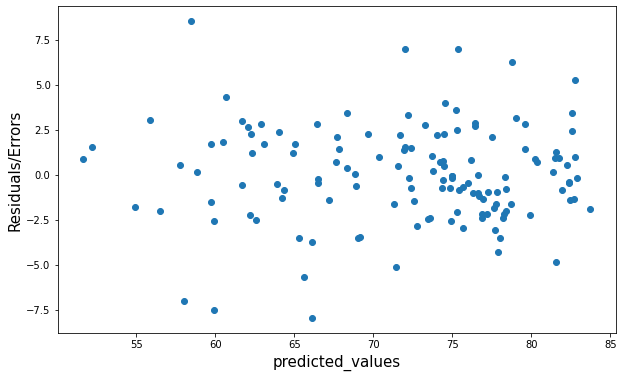

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(MLR_model.fittedvalues,residuals)
plt.xlabel("predicted_values",fontsize =15)
plt.ylabel("Residuals/Errors",fontsize=15)
plt.show()

In [48]:
# All the test for residuals seems like homoscedastic. Hence we can say that residuals are constants.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
X = df_lifeExp.iloc[:,[2,6,7]]
y = df_lifeExp['Life_Expectancy']   

In [50]:
MLR_model = LR.fit(X,y)
MLR_model 

LinearRegression()

In [51]:
predicted = MLR_model.predict(X)
predicted

array([61.37644108, 75.17077635, 74.31405189, 61.38301174, 73.73588981,
       73.98949489, 74.32062255, 73.88568966, 73.88568966, 74.74898478,
       74.31405189, 74.95659523, 74.74241412, 74.74241412, 75.17077635,
       75.22801255, 74.09987077, 71.08819385, 75.06040046, 75.17077635,
       70.6466903 , 74.42442778, 74.74898478, 75.17077635, 73.40009123,
       73.45732743, 74.09987077, 73.71398106, 72.80821343, 71.84768374,
       75.5178306 , 64.03335839, 64.4814326 , 74.4709968 , 75.17077635,
       73.45732743, 73.56770332, 55.68029492, 73.67150854, 74.09987077,
       75.17077635, 74.74241412, 74.74241412, 74.85936067, 73.88568966,
       71.95805963, 72.62193731, 71.33522827, 73.88568966, 73.56770332,
       57.50411973, 74.31405189, 74.00016206, 70.23804005, 75.17077635,
       74.97135891, 75.64342962, 63.51698294, 74.63203823, 73.76874311,
       74.60432939, 72.81478409, 75.34248494, 74.44413976, 62.64181579,
       64.20811554, 73.98292423, 60.77072707, 74.74241412, 75.51

In [52]:
errors = y-predicted # can use model.resid
errors

0      3.623559
1      2.629224
2      1.285948
3     -8.983012
4      2.664110
         ...   
177    1.499397
178    1.257586
179   -2.383088
180    5.905524
181   -5.710979
Name: Life_Expectancy, Length: 173, dtype: float64

In [53]:
SSE = np.sum(errors**2)

In [54]:
print("UNEXPLAINED ERRORS",SSE)

UNEXPLAINED ERRORS 7272.464916334297


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
X = df_lifeExp[["Malnourished5_9"]]
y = df_lifeExp['Life_Expectancy']

In [56]:
MLR_model = LR.fit(X,y)
print("Coefficient",MLR_model.coef_,"Intercept",MLR_model.intercept_)

Coefficient [-0.89331203] Intercept 76.06253141399701


In [57]:
MLR_model = sm.OLS(y,sm.add_constant(X)).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     48.24
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           7.54e-11
Time:                        05:52:29   Log-Likelihood:                -583.92
No. Observations:                 173   AIC:                             1172.
Df Residuals:                     171   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              76.0625      0.796     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# AS we see that the intercept is 73.1322,when the all features are zero.

In [59]:
#βMalnourished5_9 = -0.5004, it implies that the average decrease in the life expectancy of the
#people due to the malnourshment of children aged between 5 to 9 years,keeping other variables constant

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# select the variable describing adult mortality rate
# reshape(): used to change the dimension of input since SGDRegressor expects atleast a 2-D numpy array

X = df_lifeExp.iloc[:,1].values # we use iloc so the values of x is in list of series 
X = X.reshape(-1,1) # we reshape the x to change it to 2-D array

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [62]:
SLR_model = LR.fit(X_train,y_train)
SLR_pred = SLR_model.predict(X_train)

In [63]:
from sklearn.linear_model import SGDRegressor

In [64]:
SGD = SGDRegressor(random_state=1)
SGD_model = SGD.fit(X_train,y_train)
SGD_pred = SGD_model.predict(X_train)

In [65]:
print("using Linear algorithm intercept and coefficient",SLR_model.intercept_,SLR_model.coef_)

using Linear algorithm intercept and coefficient 0.009483534435590673 [-0.78562968]


In [66]:
print("using SGD algorith intercept and coefficient",SGD_model.intercept_,SGD_model.coef_)

using SGD algorith intercept and coefficient [0.00820688] [-0.76887191]


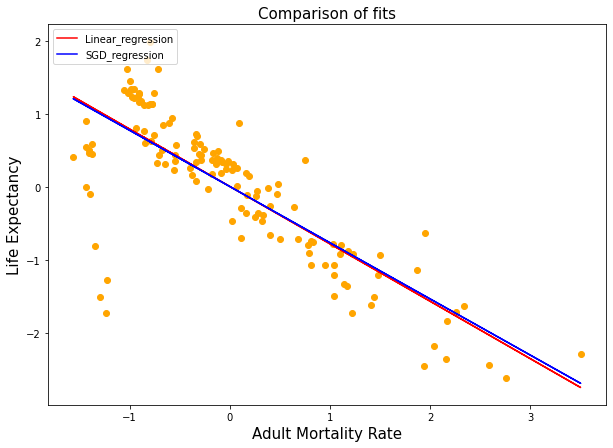

In [67]:
# set the figure size 
plt.figure(figsize=(10,7))

# plot the scatter plot
# colors: set the color of the points in the scatter plot
plt.scatter(X_train, y_train,color='orange')

# set xlabel for the plot
plt.xlabel("Adult Mortality Rate",fontsize = 15)

# set ylabel for the plot
plt.ylabel("Life Expectancy",fontsize = 15)

# set title for the plot
plt.title("Comparison of fits",fontsize = 15)

# plot the regression line for the two models
# color: set the color of the line
# label: set the label of the line for the legend
plt.plot(X_train,SLR_pred,color ="red",label="Linear_regression")
plt.plot(X_train,SGD_pred,color="blue",label="SGD_regression")
# set the position of legend
plt.legend(loc='upper left')

# disply the plot
plt.show()

In [68]:
# No for this Adult_MOrtality feature They both are fitting the nearly same regression line.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
X = df_lifeExp.iloc[:,[2,6,7]]
y = y
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=10)

In [71]:
SGD = SGDRegressor(random_state=10)
SGD_model = SGD.fit(X_train,y_train)

In [72]:
LR = LinearRegression()
MLR_model = LR.fit(X_train,y_train)

In [73]:
df_immunization=df_lifeExp.iloc[:,[2,6,7]]
df_coeff = pd.DataFrame([MLR_model.coef_, SGD_model.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])
df_coeff

,Hepatitis B,Polio,Diphtheria
linreg_sklearn_coeff,-0.156011,0.341006,0.443232
linreg_SGD_coeff,0.044471,0.333959,0.242614


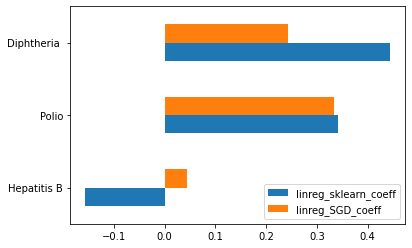

In [74]:
df_immunization=df_lifeExp.iloc[:,[2,6,7]]
df_coeff = pd.DataFrame([MLR_model.coef_,SGD_model.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])
df_coeff.T.plot.barh()


In [75]:
MLR_model.coef_

array([-0.15601111,  0.34100566,  0.4432324 ])

In [76]:
SGD_model.coef_

array([0.04447119, 0.33395921, 0.24261394])

In [77]:
from sklearn.model_selection import cross_val_score,KFold
CGD=LinearRegression()
SGD=SGDRegressor(random_state=1)
X=df_immunization
sc=StandardScaler()
X_std=sc.fit_transform(X)
kf=KFold(n_splits=3,shuffle=True,random_state=0)
rmse=cross_val_score(CGD,X_std,y,cv=kf,scoring='neg_root_mean_squared_error')
CGD_be=np.mean(np.abs(rmse))
CGD_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_error_CGD',CGD_be)
print('Var_error_CGD',CGD_ve)

Bias_error_CGD 0.9064852812556086
Var_error_CGD 0.1876085262818809


In [78]:
# AS we see that the SGD regression model found less coeffient value as compare to the Linear_regression model
# Hence we can say that SGD model will give better pridiction.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
from sklearn.metrics import mean_squared_error as mse

In [79]:
X = df_lifeExp.drop("Life_Expectancy",axis=1)
X_scaler = StandardScaler()

y = df_lifeExp["Life_Expectancy"]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=10)

In [80]:
LR = LinearRegression()

In [81]:
MLR_model.fit(X_train,y_train)

LinearRegression()

In [83]:
train_pred = MLR_model.predict(X_train)
test_pred = MLR_model.predict(X_test)

In [84]:
mse_train = mse(y_train,train_pred)
mse_test = mse(y_test,test_pred)

In [85]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [86]:
print("Train rmse",rmse_train,"Test rmse",rmse_test)

Train rmse 2.656895695380306 Test rmse 3.4247311940858958


In [92]:
R_square=MLR_model.score(x_train,y_train)

In [93]:
R_square

0.8911155163998359

In [89]:
# we could see train and test rmse values are quite close so we can say that the model is not over fit.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
# Yes we can use linear regression model to check the independent variables impact on target variable.

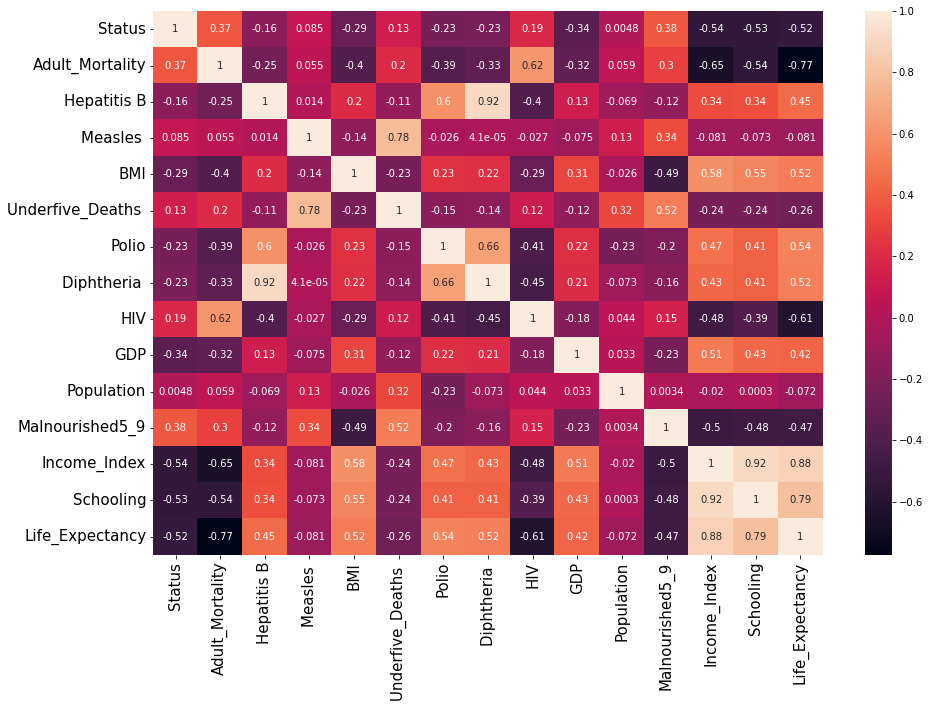

In [99]:
# set dimensions for the plot figure
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)

# create a copy of dataframe
df_features = df_lifeExp.iloc[:,:15]

# plot the heat map
# corr: give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [91]:
# But before that we need to check the assumption and that must be satisfied.

In [94]:
df_lifeExp.Life_Expectancy.dtype

dtype('float64')

In [95]:
# as we that the life_expectancy feature is numeric of our first assumption is satisfied.

In [96]:
# Checking for multicollinearity.

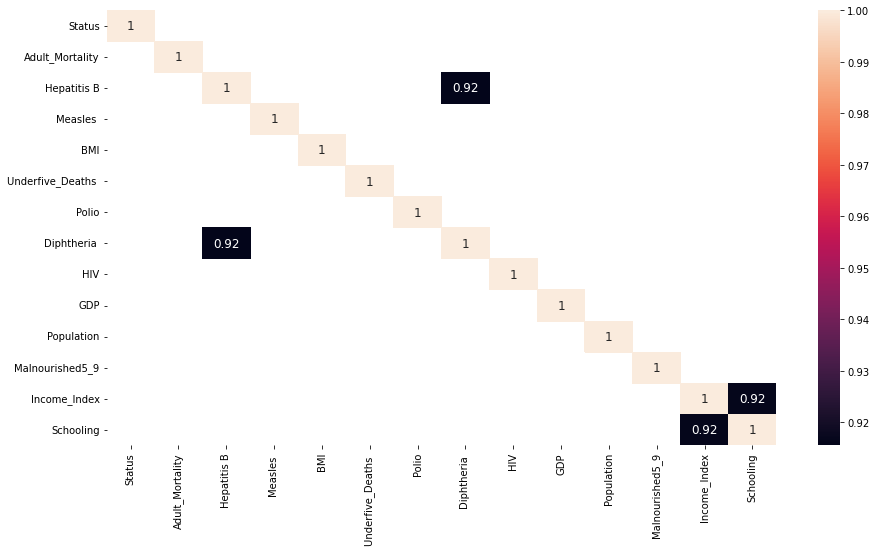

In [97]:
plt.figure(figsize =(15,8))
sns.heatmap(df_lifeExp.drop("Life_Expectancy",axis =1).corr()[df_lifeExp.drop("Life_Expectancy",axis =1).corr()>.9],annot=True,annot_kws={"size":12})
plt.show()

In [ ]:
# we can see that Hepatitis B and Diphtheria have multicollinearity and income_Index and schoolig have multicollinearity.

In [ ]:
X = df_lifeExp.drop("Life_Expectancy",axis =1)
y = df_lifeExp['Life_Expectancy']

In [ ]:
X= sm.add_constant(X)
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     76.22
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           5.55e-64
Time:                        21:20:11   Log-Likelihood:                -422.55
No. Observations:                 173   AIC:                             877.1
Df Residuals:                     157   BIC:                             927.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.7149      2.33

In [ ]:
# As we the coefficient of each varibles and p_values, we know the how the independent variables impact on target variable.

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
# Ridge regression reduces the sensitivity of regression parameters to multicollinearity. This is accomplished through
# penality applied to the cost function. Imposoing a penalty functionkeeps the value of predictors below a pre-specified value.

In [101]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [102]:
X = df_lifeExp.drop('Life_Expectancy',axis = 1)
y = df_lifeExp['Life_Expectancy']
X = SS.fit_transform(X)
y = (y-y.mean())/y.std()
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=1)

In [103]:
x_train.shape,y_train.shape

((138, 14), (138,))

In [128]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 7.5)

In [129]:
MLR_model = ridge.fit(x_train,y_train)

In [130]:
test_prd=ridge.predict(x_test)
train_prd = ridge.predict(x_train)

In [131]:
from sklearn.metrics import mean_squared_error

In [132]:
test_mse = mean_squared_error(y_test,test_prd)
train_mse = mean_squared_error(y_train,train_prd)

In [133]:
test_rmse = np.sqrt(test_mse)
train_rmse = np.sqrt(train_mse)

In [134]:
test_rmse,train_rmse

(5.723188620590126, 5.704401970404256)

In [135]:
# We can see that using the redge regression we reducing the multicollinearity problem.becuase the 
# we are adding the alpha value and cost function for reducing the B1 and fiding the low error.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [140]:
df_lifeExp.iloc[:,[3,8,2,6,7]].head()

,Measles,HIV,Hepatitis B,Polio,Diphtheria
0,1154,0.1,65.0,6,65
1,0,0.1,99.0,99,99
2,63,0.1,95.0,95,95
3,118,1.9,64.0,7,64
4,0,0.2,99.0,86,99


In [112]:
X = df_lifeExp.iloc[:,[3,8,2,6,7]]
y = df_lifeExp['Life_Expectancy']

In [136]:
X = sm.add_constant(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=10)
MLR_model = sm.OLS(y_train,x_train).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     26.22
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           2.55e-18
Time:                        06:34:19   Log-Likelihood:                -436.08
No. Observations:                 138   AIC:                             884.2
Df Residuals:                     132   BIC:                             901.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          63.0085      2.536     24.849      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
train_pred = MLR_model.predict(x_train)
test_pred =MLR_model.predict(x_test)

In [138]:
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

In [116]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [117]:
print("train_rmse",train_rmse,"test_rmse",test_rmse)

train_rmse 5.7034240059677455 test_rmse 5.728231682843468


In [118]:
# we could see that train and test rmse are nearly same so we can say that our model is not overfit.

In [119]:
MLR_model.pvalues[MLR_model.pvalues<0.05]

const    1.277152e-51
HIV      7.081057e-10
Polio    1.064558e-03
dtype: float64

In [120]:
# we can see these are the features are significantly contributing for predicting the life expectancy.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ridge = Ridge(alpha = 1)
X = df_lifeExp.iloc[:,[3,8,12,11]]
y = df_lifeExp['Life_Expectancy']

In [ ]:
LR = LinearRegression()

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=10)

In [ ]:
MLR_model = LR.fit(X,y)

In [ ]:
train_predict = MLR_model.predict(x_train)
test_predict = MLR_model.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train,train_predict)
test_mse = mean_squared_error(y_test,test_predict)

In [ ]:
train_RMSE = np.sqrt(train_mse)
test_RMSE = np.sqrt(test_mse)

In [ ]:
print('The train rmse and test rmse using linear regressor',train_RMSE,test_RMSE)

The train rmse and test rmse using linear regressor 5.492754103715008 5.896740651653842


In [ ]:
# As we could see that there is lot of difference in train and test rmse so we can decied that the model is overfitted.

In [ ]:
# We are using the lasso reggressor for tunning the Bcoeffients and reducing the error.
# by doing the tuning we can reduce multicollinearity problem.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'X'
X = X_scaler.fit_transform(X)

# standardize the target variable explicitly 
y = (y - y.mean()) / y.std()

In [ ]:
##### use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
lasso = Lasso(alpha = 1)

# fit the model on train set using fit()
lasso_model = lasso.fit(X_train, y_train)

# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train'
# y_train: actual values ofthe target variable for the train dataset
 
# predict the output of the target variable from the train data 
train_pred = lasso_model.predict(X_train)

# calculate the MSE using the "mean_squared_error" function
# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)
 
# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
# test_pred: prediction made by the model on the test dataset 'y_train'
# y_test: actual values of the target variable for the test dataset
 
# predict the output of the target variable from the test data
test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.6436
Root Mean Squared Error (RMSE) on test set:  6.1908


In [ ]:
lasso_model.coef_[lasso_model.coef_==0]

array([0.])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.1,l1_ratio=0.0001)

In [ ]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initializing the standard scalar
X_scaler = StandardScaler()

# standardizing all the columns of df_ipl
X = X_scaler.fit_transform(X)

# standardizing the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [ ]:
EN_model = EN.fit(X_train,y_train)

In [ ]:
train_pred = EN_model.predict(X_train)
test_pred = EN_model.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

In [ ]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [ ]:
print("train and test rmse values using Elastic Net regressor",train_rmse,test_rmse)

train and test rmse values using Elastic Net regressor 0.3580675793286309 0.35441222437304715


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [141]:
# selecting the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=1)

In [143]:
LR = LinearRegression()

In [144]:
LR_model = LR.fit(X_train,y_train)

In [145]:
train_pred = LR_model.predict(X_train)
test_pred = LR_model.predict(X_test)

In [146]:
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)

In [147]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [148]:
print("train and test rmse",train_rmse,test_rmse)

train and test rmse 2.3333091433866964e-11 9.46802227069508e-12


In [149]:
# so we can see that over model not overfit.

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# select the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()

In [ ]:
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]

In [ ]:
ridge_grid = GridSearchCV(estimator=ridge,param_grid=tuned_paramaters,cv = 5)

In [ ]:
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid=[{'alpha': [7, 8, 9, 10, 11]}])

In [ ]:
ridge_grid.best_params_

{'alpha': 11}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
lasso = Lasso()

In [ ]:
lasso_grid = GridSearchCV(estimator=lasso,param_grid=tuned_paramaters,cv = 5)

In [ ]:
lasso_grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(), param_grid=[{'alpha': [7, 8, 9, 10, 11]}])

In [ ]:
lasso_grid.best_params_

{'alpha': 7}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
tuned_parameters = [{"alpha" : [0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                    "l1_ratio" : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

In [ ]:
enet = ElasticNet()

In [ ]:
# select the variables describing malnutrition: Malnourished10_19, Malnourished5_9
# select the variables describing diseases: Measles, HIV
X = df_lifeExp.iloc[:,[12,11,3,8]]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.2)

In [ ]:
enet_grid = GridSearchCV(estimator=enet,param_grid=tuned_parameters,cv = 10)

In [ ]:
enet_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                          'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9]}])

In [ ]:
enet_grid.best_params_

{'alpha': 1.5, 'l1_ratio': 0.9}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# selecte the independent variables 
X = df_lifeExp.iloc[:,:15]

# set the dependent variable
y = df_lifeExp['Life_Expectancy']

# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of df_lifeExp
X = X_scaler.fit_transform(X)

# standardize the target explicitly and storing it in a new variable 'y'
y = (y - y.mean()) / y.std()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

In [ ]:
enet = ElasticNet(alpha = 0.8)

In [ ]:
tuned_paramaters = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

In [ ]:
enet_grid = GridSearchCV(estimator=enet,param_grid=tuned_paramaters,cv =10)

In [ ]:
enet_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(alpha=0.8),
             param_grid=[{'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}])

In [ ]:
enet_grid.best_params_

{'l1_ratio': 0.005}